In [1]:
#importing Libraries
import numpy as np   
np.random.seed(42)   # so that output would be same
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline  
## our plot lies on the same notebook
# models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
# Evaluation
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve
# for warning
from warnings import filterwarnings
filterwarnings("ignore")  #To remove any kind of warning

In [2]:
#load the dataset
data = pd.read_csv("diabetes.csv")

In [3]:
#Preprocessing the dataset
print(data.shape)  ### Return the shape of data 
print(data.ndim)   ### Return the n dimensions of data
print(data.size)   ### Return the size of data 
print(data.isna().sum())  ### Returns the sum fo all na values
print(data.info())  ### Give concise summary of a DataFrame

(767, 9)
2
6903
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               767 non-null    int64  
 1   Glucose                   767 non-null    int64  
 2   BloodPressure             767 non-null    int64  
 3   SkinThickness             767 non-null    int64  
 4   Insulin                   767 non-null    int64  
 5   BMI                       767 non-null    float64
 6   DiabetesPedigreeFunction  767 non-null    float64
 7   Age                       767 non-null    int64  
 8   Outcome                   767 non-null    

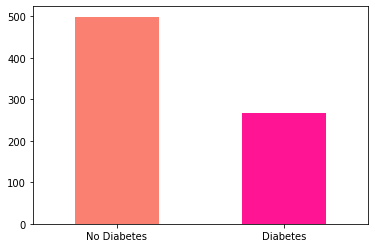

In [4]:
#Visualise Outcomes
data["Outcome"].value_counts().plot(kind="bar",color=["salmon","deeppink"])
plt.xticks(np.arange(2), ('No Diabetes', 'Diabetes'),rotation=0);

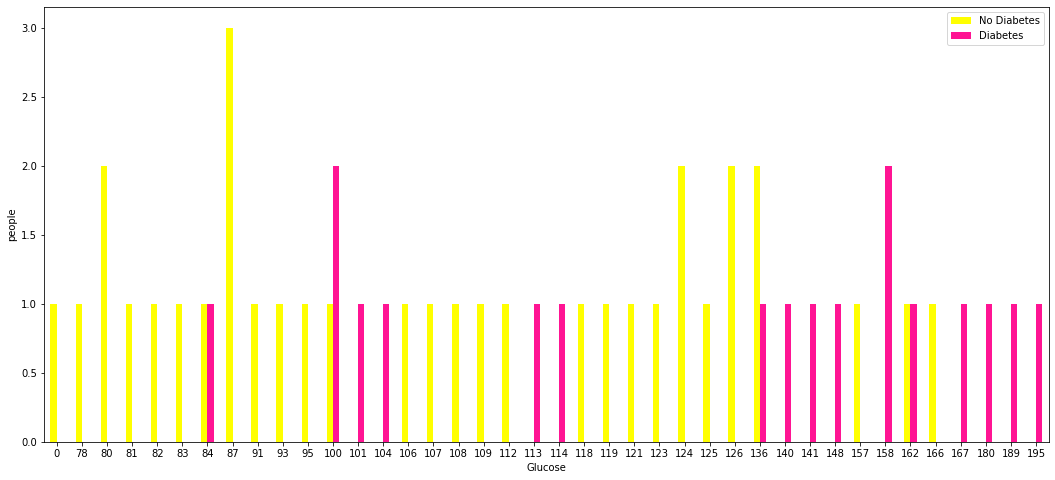

In [5]:
# Comparing Glucose with the Outcome
pd.crosstab(data.Glucose[::15],data.Outcome).plot(kind="bar",figsize=(18,8),color=["yellow","deeppink"])
plt.ylabel("people");
plt.xticks(rotation=0);
plt.legend(['No Diabetes', 'Diabetes']);

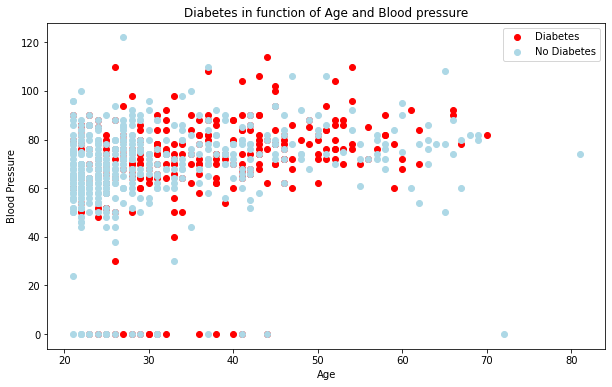

In [6]:
#find out Blood Pressure and age of entries who have diabetes
plt.figure(figsize=(10,6))
# Scatter with positive example
plt.scatter(data.Age[data.Outcome==1],data.BloodPressure[data.Outcome==1],c="Red");
# Scatter with negative example
plt.scatter(data.Age[data.Outcome==0],data.BloodPressure[data.Outcome==0],c="lightblue");
# Add some helpful info
plt.title("Diabetes in function of Age and Blood pressure")
plt.xlabel("Age")
plt.ylabel("Blood Pressure")
plt.legend(["Diabetes","No Diabetes"]);

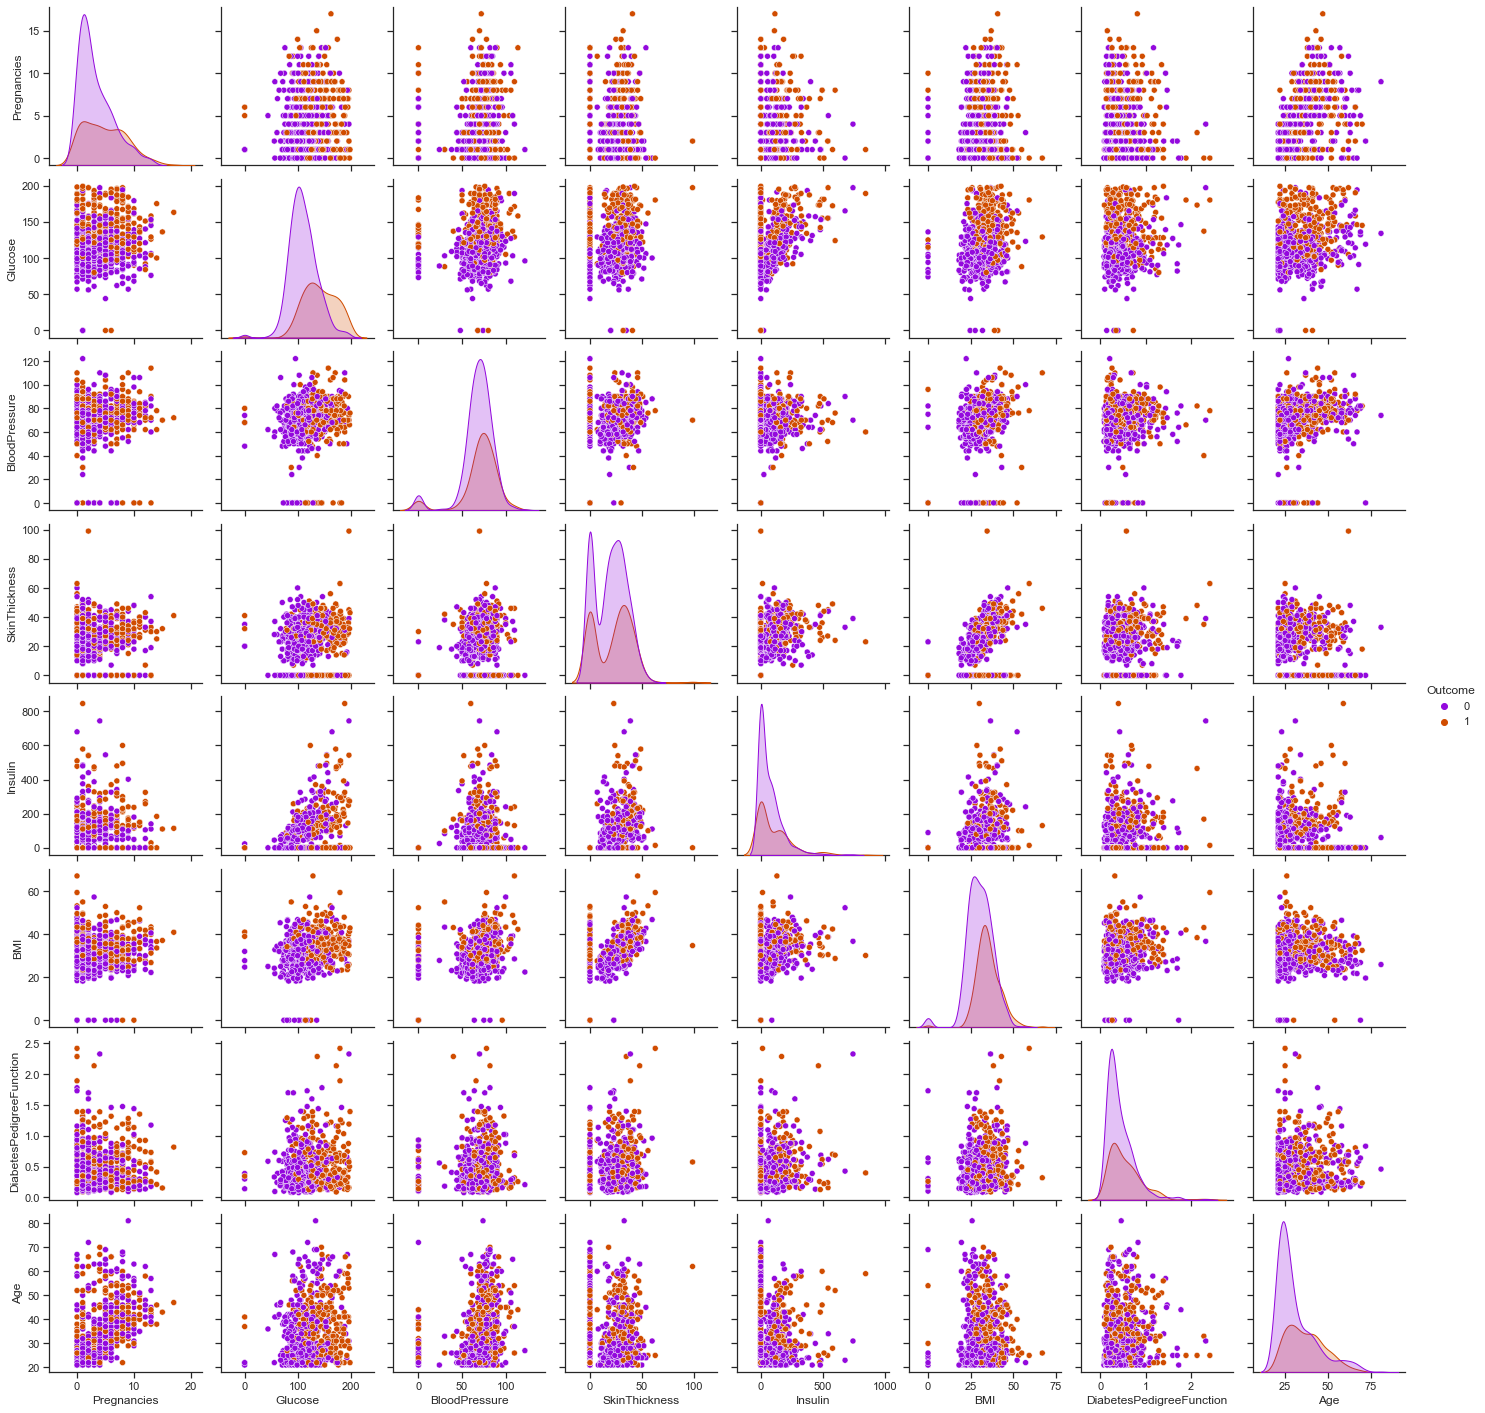

In [7]:
## Pairplotting of dataframe
import seaborn as sns
sns.set(style="ticks", color_codes=True)
sns.pairplot(data,hue='Outcome',palette='gnuplot');

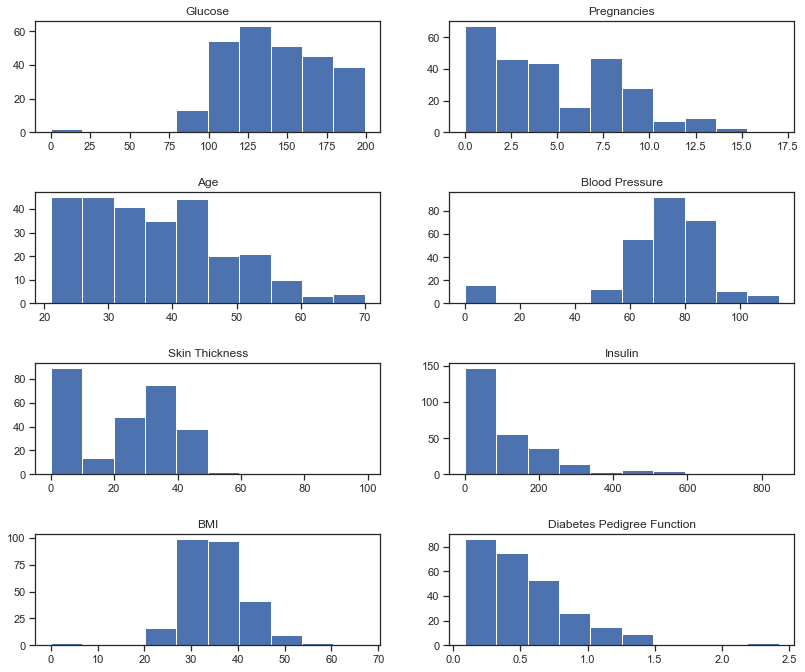

In [8]:
# Histogram of all coloumns when the Outcome is 1( has Diabetes)
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(12, 10))
fig.tight_layout(pad=3.0)
ax[0,0].set_title('Glucose')
ax[0,0].hist(data.Glucose[data.Outcome==1]);
ax[0,1].set_title('Pregnancies')
ax[0,1].hist(data.Pregnancies[data.Outcome==1]);
ax[1,0].set_title('Age')
ax[1,0].hist(data.Age[data.Outcome==1]);
ax[1,1].set_title('Blood Pressure')
ax[1,1].hist(data.BloodPressure[data.Outcome==1]);
ax[2,0].set_title('Skin Thickness')
ax[2,0].hist(data.SkinThickness[data.Outcome==1]);
ax[2,1].set_title('Insulin')
ax[2,1].hist(data.Insulin[data.Outcome==1]);
ax[3,0].set_title('BMI')
ax[3,0].hist(data.BMI[data.Outcome==1]);
ax[3,1].set_title('Diabetes Pedigree Function')
ax[3,1].hist(data.DiabetesPedigreeFunction[data.Outcome==1]);

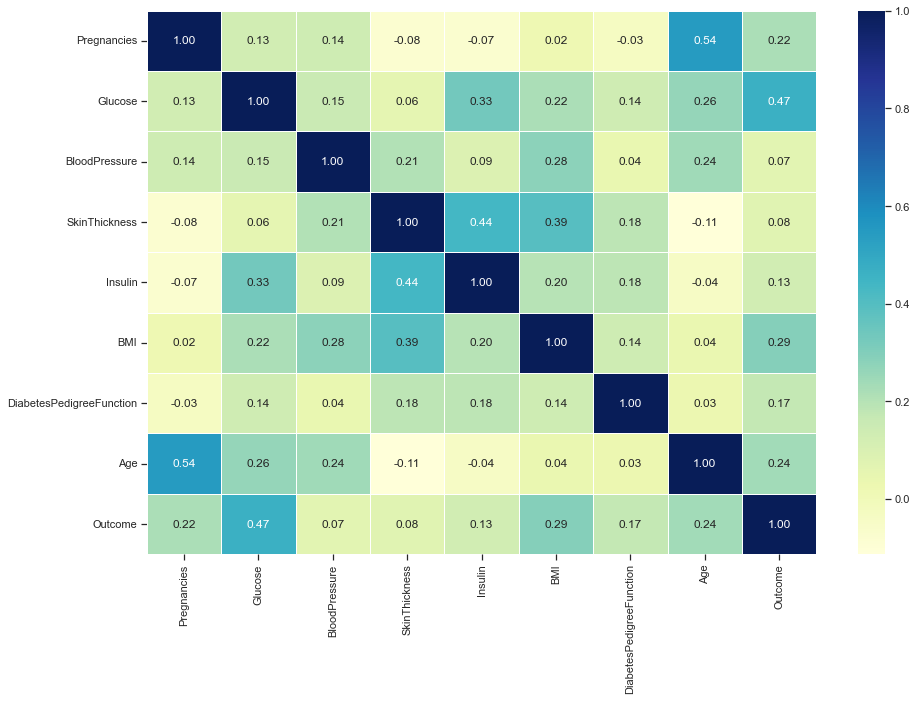

In [9]:
# correlation matrix between columns
## It shows the correlation(positive,neagative) between different columns(only integer value columns) 
corr_matrix = data.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,annot=True,linewidth=0.5,fmt=".2f",cmap="YlGnBu")

In [10]:
#Modelling and training
#random data shuffelin
data.sample(frac=1)
#Spliting the data
X = data.drop("Outcome",axis=1)
y = data["Outcome"]
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.2)
## Build an model (Logistic Regression)
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=0)
log_reg.fit(X_train,y_train);
## Evaluating the model
log_reg = log_reg.score(X_test,y_test)
## Build an model (KNN)
knn = KNeighborsClassifier()
knn.fit(X_train,y_train);
## Evaluating the model
knn = knn.score(X_test,y_test)
## Build an model (Random forest classifier)
clf= RandomForestClassifier()
clf.fit(X_train,y_train);
## Evaluating the model
clf = clf.score(X_test,y_test)
## Build an model (Support Vector Machine)
svm = SVC()
svm.fit(X_train,y_train)
## Evaluating the model
svm = svm.score(X_test,y_test)

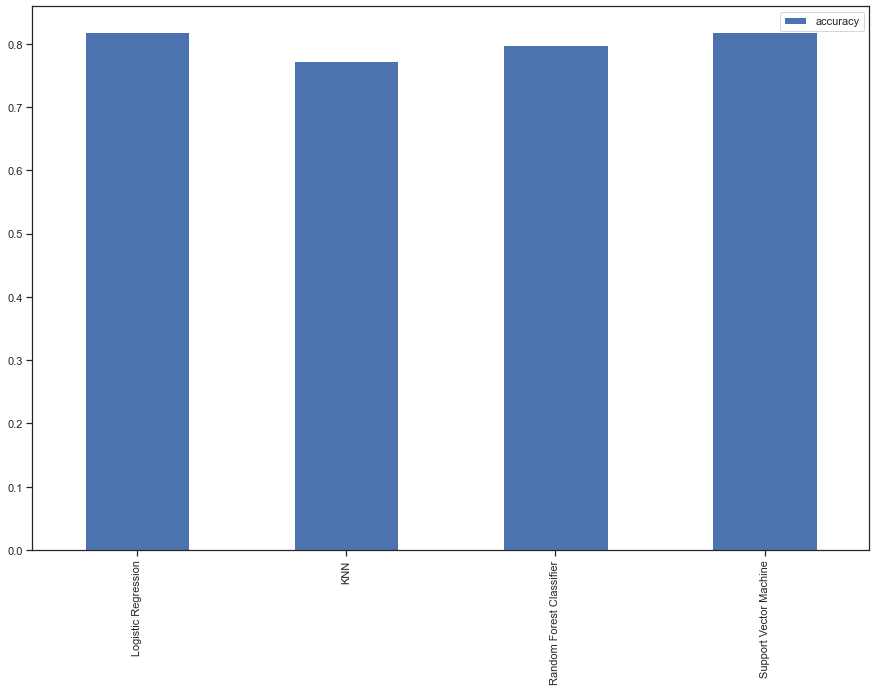

In [11]:
#Training performance of all the models
model_compare = pd.DataFrame({"Logistic Regression":log_reg,
"KNN":knn,
"Random Forest Classifier":clf,
"Support Vector Machine":svm,},
index=["accuracy"])
model_compare.T.plot.bar(figsize=(15,10));

In [12]:
#Improving accuracy using Hyperparameter tuning
#Hyperparameter Tuning using RandomizedSearchcv
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),"solver": ["liblinear"]}
# Tune LogisticRegression
np.random.seed(42)
# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                  param_distributions=log_reg_grid,
                                  cv=5,
                                  n_iter=20,
                                  verbose=True)
# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)
score = rs_log_reg.score(X_test,y_test)
print(score*100)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
83.11688311688312


In [13]:
#Hyperparameter Tuning using GridSearchcv
log_reg_grid = {'C': np.logspace(-4,4,30),
"solver":["liblinear"]}
#setup  the gird cv
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                           verbose=True)
#fit grid search cv
gs_log_reg.fit(X_train,y_train)
score = gs_log_reg.score(X_test,y_test)
print(score*100)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
83.76623376623377


In [14]:
#Evaluate the model
#Predict x_test
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

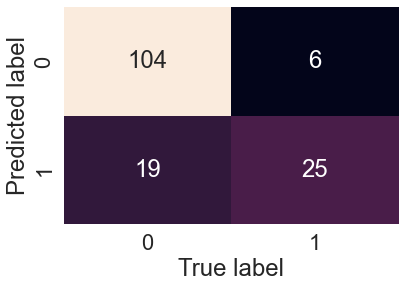

In [15]:
#Confusion matrix
sns.set(font_scale=2)
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_preds), annot=True,cbar=False, fmt='g')
plt.xlabel("True label")
plt.ylabel("Predicted label");

In [16]:
#Accuracy score
print(accuracy_score(y_test,y_preds))

0.8376623376623377


In [17]:
#Classification Report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.85      0.95      0.89       110
           1       0.81      0.57      0.67        44

    accuracy                           0.84       154
   macro avg       0.83      0.76      0.78       154
weighted avg       0.83      0.84      0.83       154



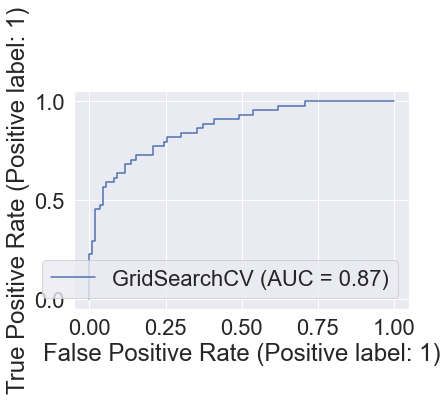

In [18]:
#ROC curve
plot_roc_curve(gs_log_reg,X_test,y_test)

In [19]:
#Save and Load the model
import pickle
# Save trained model to file
pickle.dump(gs_log_reg, open("Diabetes.pkl", "wb"))
loaded_model = pickle.load(open("Diabetes.pkl", "rb"))
loaded_model.predict(X_test)
loaded_model.score(X_test,y_test)

0.8376623376623377